In [65]:
# Pipelines imports
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit


In [66]:
# importit bibliotheque 
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

data_path = os.path.join(os.path.curdir,'data')
print(os.getcwd())
# loadit les csv
general_data_brute = pd.read_csv(os.path.join(data_path,'general_data.csv'))
in_time_brute = pd.read_csv(os.path.join(data_path, 'in_time.csv'))
out_time_brute = pd.read_csv(os.path.join(data_path, 'out_time.csv'))
manager_survey_data_brute = pd.read_csv(os.path.join(data_path, 'manager_survey_data.csv'))
employee_survey_data_brute = pd.read_csv(os.path.join(data_path, 'employee_survey_data.csv'))



c:\Users\Nazim\Documents\Dev\HumanForYou


In [67]:
general_data_brute.head() #affichit head tae csv

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [68]:
general_data_brute.describe() #descriptit general data

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [69]:
general_data_brute.info() #affichit les infos ta3 chaque collone

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

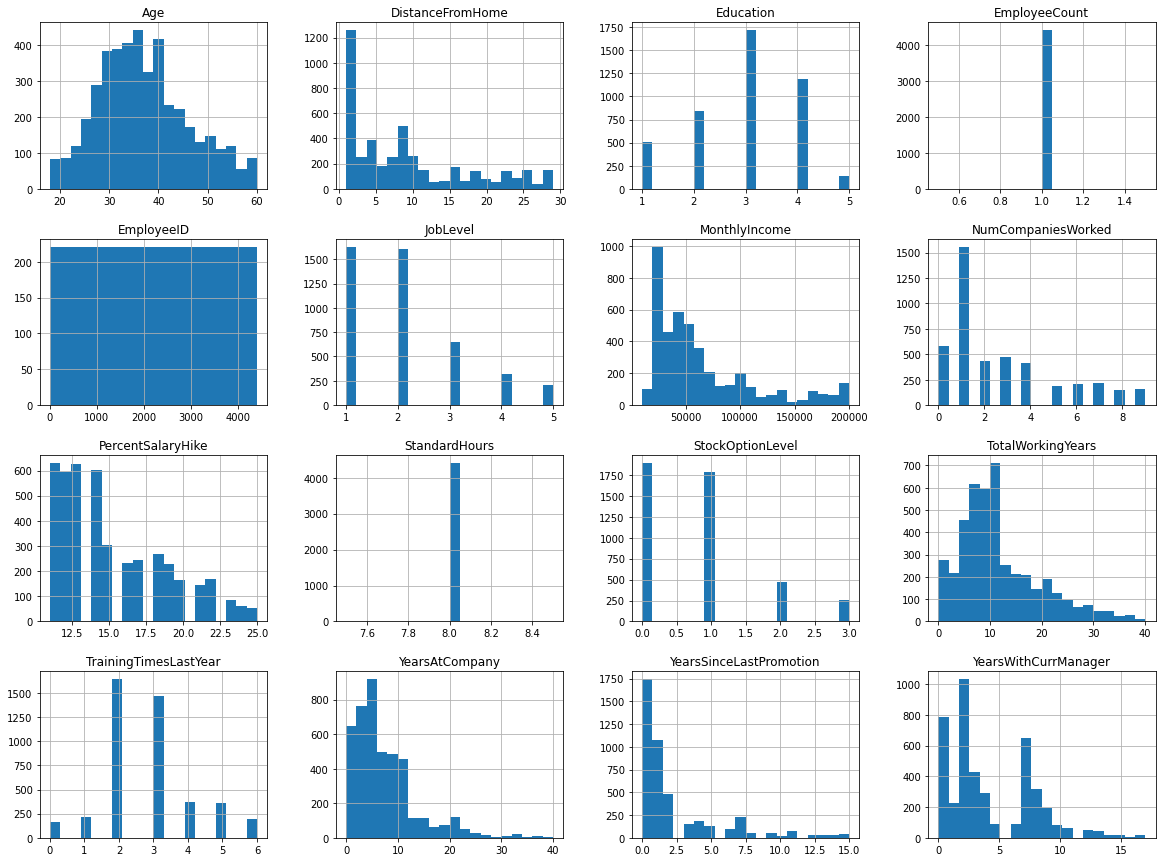

In [70]:
general_data_brute.hist(bins=20, figsize=(20, 15))
plt.show()

# affichit histogramme tae dataset general

In [71]:
manager_survey_data_brute.head()


,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [72]:
manager_survey_data_brute.describe()

,EmployeeID,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000
mean,2205.500000,2.729932,3.153741
std,1273.201673,0.711400,0.360742
min,1.000000,1.000000,3.000000
25%,1103.250000,2.000000,3.000000
50%,2205.500000,3.000000,3.000000
75%,3307.750000,3.000000,3.000000
max,4410.000000,4.000000,4.000000


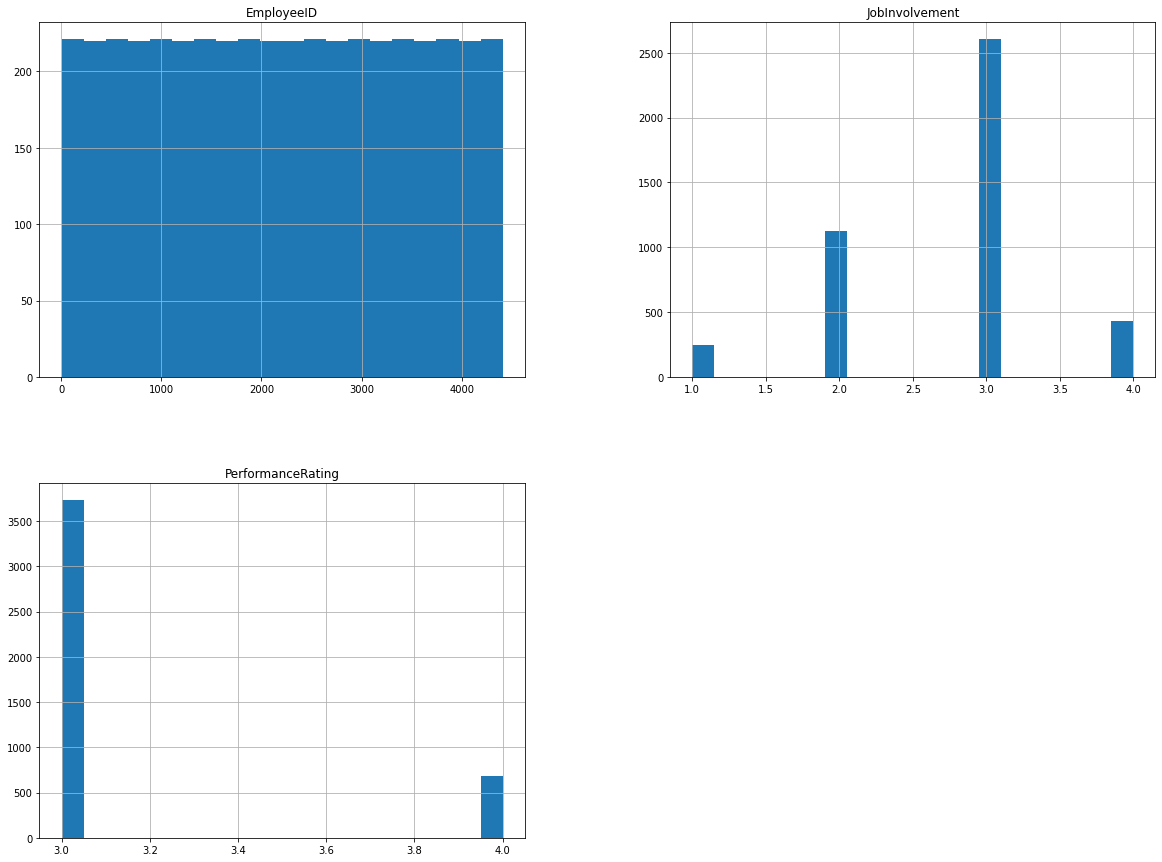

In [73]:
manager_survey_data_brute.hist(bins=20, figsize=(20, 15))
plt.show()


In [74]:
employee_survey_data_brute.head()


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [75]:
employee_survey_data_brute.describe()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4385.000000,4390.000000,4372.000000
mean,2205.500000,2.723603,2.728246,2.761436
std,1273.201673,1.092756,1.101253,0.706245
min,1.000000,1.000000,1.000000,1.000000
25%,1103.250000,2.000000,2.000000,2.000000
50%,2205.500000,3.000000,3.000000,3.000000
75%,3307.750000,4.000000,4.000000,3.000000
max,4410.000000,4.000000,4.000000,4.000000


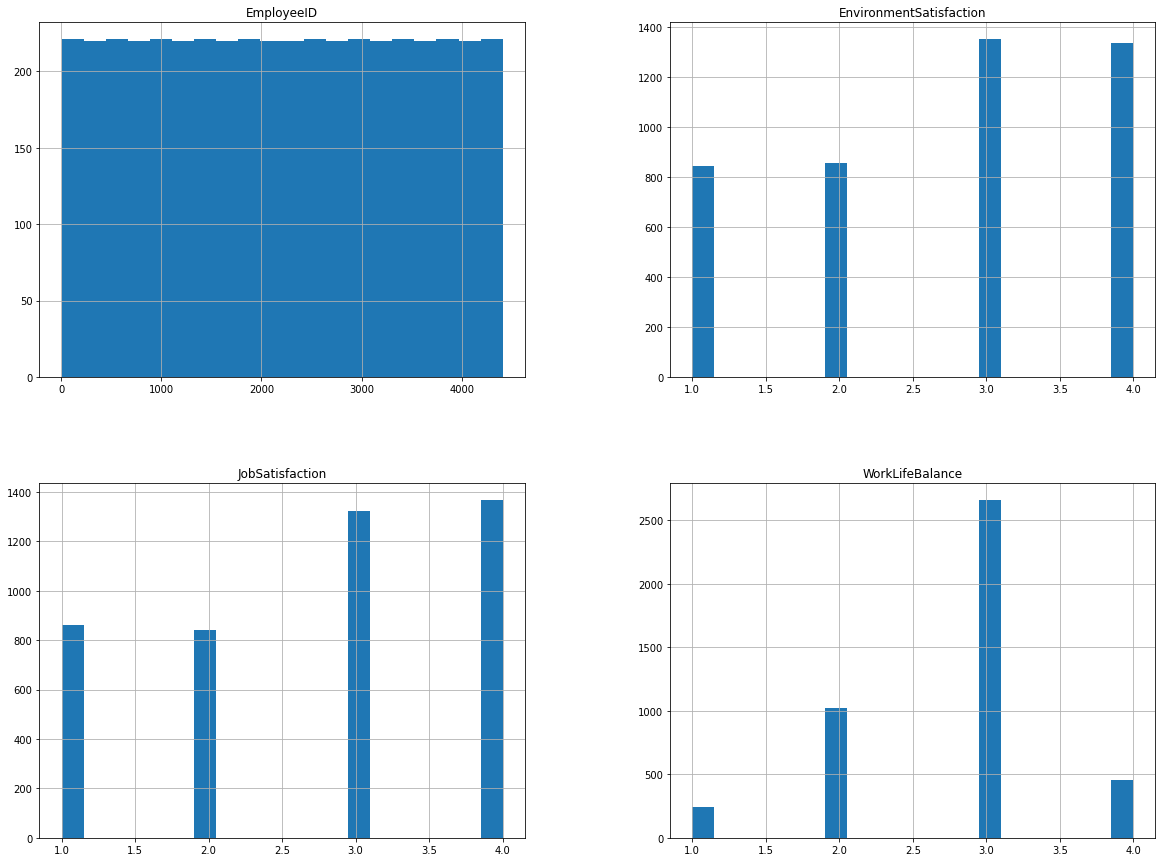

In [76]:
employee_survey_data_brute.hist(bins=20, figsize=(20, 15))
plt.show()

collone a ajouter : 
    abscences
    heures supp
    

In [77]:
general_data = general_data_brute.drop('Over18',axis=1)
general_data = general_data.drop('StandardHours',axis=1)
general_data = general_data.drop('EmployeeCount',axis=1)


# deletit zoudj les collone

In [78]:
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,...,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,...,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,...,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,...,Single,23420,4.0,12,2,9.0,2,6,0,4


In [79]:
in_time_brute.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [80]:
out_time = out_time_brute.copy()
out_time['employee_id'] = out_time[out_time.columns[0]]
out_time = out_time.drop(out_time.columns[0],axis=1)
# segemt la collone li ma 3ndhach asem 

In [81]:
in_time = in_time_brute.copy()
in_time['employee_id'] = in_time[in_time.columns[0]]
in_time = in_time.drop(in_time.columns[0],axis=1)

# segemt la collone li ma 3ndhach asem


In [82]:
free_days = []
for col in in_time.columns:
    if in_time[col].isna().all():
        in_time = in_time.drop(col,axis=1)
        out_time = out_time.drop(col,axis=1)

# nehit les jours ferié


In [83]:
out_time.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,employee_id
0,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,2015-01-15 17:22:13,2015-01-16 17:35:11,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33,1
1,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,2015-01-15 17:14:44,2015-01-16 17:40:57,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58,2
2,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,2015-01-15 17:21:29,2015-01-16 17:18:13,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50,3
3,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,2015-01-15 16:53:26,2015-01-16 16:52:34,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14,4
4,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,2015-01-15 18:21:48,2015-01-16 18:28:03,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14,5


In [84]:
# count work hours for each employee
from datetime import datetime, timedelta
employees_hours = []
additional_hours = []
minus_hours = []
abscences = []
for index, row in general_data.iterrows():
    employee_id = row['EmployeeID']
    in_time_employee = in_time[in_time['employee_id']
                               == employee_id].values[0]
    out_time_employee = out_time[out_time['employee_id']
                                 == employee_id].values[0]
    out_time_employee = out_time_employee[:-1]
    in_time_employee = in_time_employee[:-1]
    abscence = np.count_nonzero(in_time_employee == 'NaN')
    abscences.append(abscence)
    now = datetime.now()
    in_time_employee = np.array([datetime.strptime(
        x, '%Y-%m-%d %H:%M:%S') if not pd.isna(x) else now for x in in_time_employee])
    out_time_employee = np.array([datetime.strptime(
        x, '%Y-%m-%d %H:%M:%S') if not pd.isna(x) else now for x in out_time_employee])
    
    employee_hours = out_time_employee - in_time_employee
    employee_hours = [x.total_seconds() for x in employee_hours]
    employee_hours = sum(employee_hours)
    employees_hours.append(employee_hours/(60**2))
    nb_day = len(out_time_employee)
    additional_hour = ((8*(nb_day))-employee_hours/(60**2))
    if additional_hour < 0: 
        additional_hour = 0
        minus_hour = -1* additional_hour
    else:
        minus_hour = 0
    
    additional_hours.append(additional_hour)
    minus_hours.append(minus_hour)
general_data['worked_hour'] = employees_hours
general_data['additional_hour'] = additional_hours



In [85]:
np.count_nonzero(abscences)

0

In [86]:
general_data['worked_hour']

0       1710.686944
1       1821.676667
2       1697.204167
3       1690.514444
4       1961.512778
           ...     
4405    2070.913333
4406    1468.401944
4407    1780.231944
4408    2287.715278
4409    1621.435833
Name: worked_hour, Length: 4410, dtype: float64

In [87]:
general_data.describe()


,Age,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,worked_hour,additional_hour
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,2205.500000,2.063946,65029.312925,2.694830,15.209524,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,1821.276283,250.742404
std,9.133301,8.105026,1.023933,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327,331.361528,201.088676
min,18.000000,1.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1348.803056,0.000000
25%,30.000000,2.000000,2.000000,1103.250000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,1563.572500,24.704653
50%,36.000000,7.000000,3.000000,2205.500000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,1745.782222,246.217778
75%,43.000000,14.000000,4.000000,3307.750000,3.000000,83800.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,1967.295347,428.427500
max,60.000000,29.000000,5.000000,4410.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,2723.378056,643.196944


In [88]:
general_data = pd.merge(
    general_data, employee_survey_data_brute, on="EmployeeID", how='left')
general_data

# dert join bin general_data w survey_employee

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,worked_hour,additional_hour,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,1.0,6,1,0,0,1710.686944,281.313056,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,...,6.0,3,5,1,4,1821.676667,170.323333,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,...,5.0,2,5,0,3,1697.204167,294.795833,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,...,13.0,5,8,7,5,1690.514444,301.485556,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,...,9.0,2,6,0,4,1961.512778,30.487222,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,4406,Female,1,...,10.0,5,3,0,2,2070.913333,0.000000,4.0,1.0,3.0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,4407,Male,1,...,10.0,2,3,0,2,1468.401944,523.598056,4.0,4.0,3.0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,4408,Male,2,...,5.0,4,4,1,2,1780.231944,211.768056,1.0,3.0,3.0
4408,42,No,Travel_Rarely,Sales,18,2,Medical,4409,Male,1,...,10.0,2,9,7,8,2287.715278,0.000000,4.0,1.0,3.0


In [64]:
general_data = pd.merge(general_data, manager_survey_data_brute, on="EmployeeID",how="left")
general_data['WorkLifeBalance']
# dert join bin general_data w manager_employee


0       2.0
1       4.0
2       1.0
3       3.0
4       3.0
       ... 
4405    3.0
4406    3.0
4407    3.0
4408    3.0
4409    NaN
Name: WorkLifeBalance, Length: 4410, dtype: float64

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeID'}>,
        <AxesSubplot:title={'center':'JobLevel'}>],
       [<AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'StockOptionLevel'}>,
        <AxesSubplot:title={'center':'TotalWorkingYears'}>],
       [<AxesSubplot:title={'center':'TrainingTimesLastYear'}>,
        <AxesSubplot:title={'center':'YearsAtCompany'}>,
        <AxesSubplot:title={'center':'YearsSinceLastPromotion'}>,
        <AxesSubplot:title={'center':'YearsWithCurrManager'}>,
        <AxesSubplot:title={'center':'worked_hour'}>],
       [<AxesSubplot:title={'center':'additional_hour'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <Axe

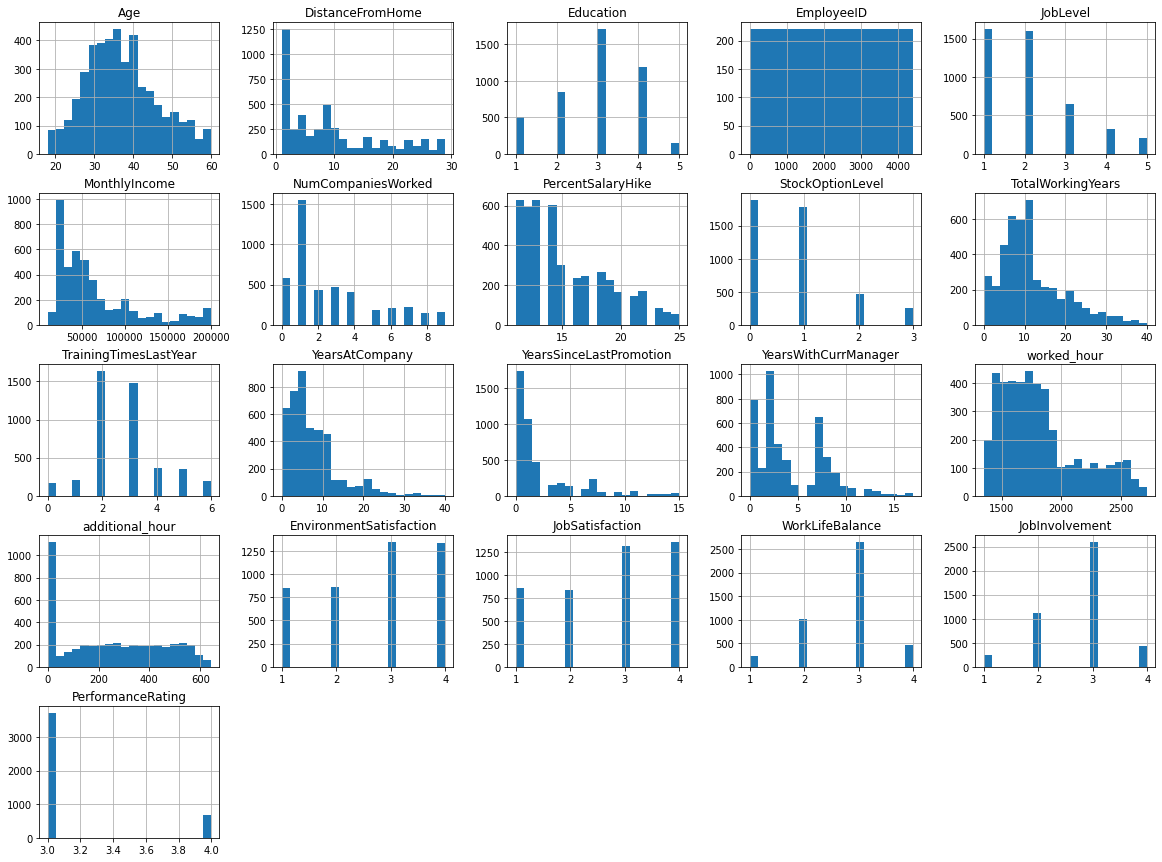

In [59]:
general_data.hist(bins=20, figsize=(20, 15))
# affichit histogramme jdid

In [60]:
boolean_columns = [
    'Attrition',
    'Gender',
]
qualitative_columns = [
    'BusinessTravel',
    'Department',
    'EducationField',
    'JobRole',
    'MaritalStatus',

]
numeric_cols = [
    'NumCompaniesWorked',
    'TotalWorkingYears',
    'EnvironmentSatisfaction',
    'JobSatisfaction',
    'WorkLifeBalance',
    'worked_hour',
    'additional_hour',
    'DistanceFromHome',
    'Education',
    'Age',
    'EmployeeID',
    'JobLevel',
    'MonthlyIncome',
    'PercentSalaryHike',
    'StockOptionLevel',
    'TrainingTimesLastYear',
    'YearsAtCompany',
    'YearsSinceLastPromotion',''
    'YearsWithCurrManager',
    'JobInvolvement',
    'PerformanceRating',
]


In [61]:
# general_data['NumCompaniesWorked'] = general_data_brute['NumCompaniesWorked'] #np.array(general_data['NumCompaniesWorked'].values, dtype=float)
# general_data['TotalWorkingYears'] = [float(str(x)) for x in general_data['TotalWorkingYears'].values]
# general_data['EnvironmentSatisfaction'] = [float(str(x)) for x in general_data['EnvironmentSatisfaction'].values]
# general_data['JobSatisfaction'] = [float(str(x)) for x in general_data['JobSatisfaction'].values]
# general_data['WorkLifeBalance'] = [float(str(x)) for x in general_data['WorkLifeBalance'].values]
general_data['WorkLifeBalance']


0       2.0
1       4.0
2       1.0
3       3.0
4       3.0
       ... 
4405    3.0
4406    3.0
4407    3.0
4408    3.0
4409    NaN
Name: WorkLifeBalance, Length: 4410, dtype: float64

In [62]:
numeric_pipline = Pipeline([
    ('fill_na',SimpleImputer(strategy='mean')),
    ('standardisation',StandardScaler),
])
col_transformer = ColumnTransformer([
    ('numeric',numeric_pipline,numeric_cols),
    ("qualitative",OneHotEncoder(),qualitative_columns),
    ('bool',OneHotEncoder(),boolean_columns)
])

In [63]:
col_transformer.fit_transform(general_data)

AttributeError: 'numpy.ndarray' object has no attribute 'fit'

In [ ]:
for col in general_data.columns:
    general_data[col].fillna(general_data[col].median,inplace=True)
    count = general_data[col].isna().sum()
    if count > 0: print(col,count)

In [ ]:
# convert Attrition to boolean
attrition_dict = {
    'No': False,
    'Yes':True
}
general_data['Attrition'] = general_data['Attrition'].map(attrition_dict).astype(bool)

<AxesSubplot:ylabel='Frequency'>

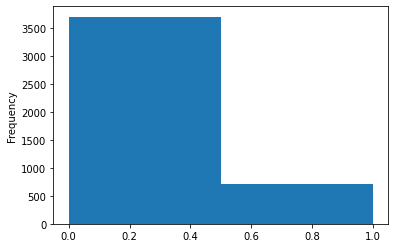

In [ ]:
general_data['Attrition'].astype(int).plot.hist(bins=2)


In [ ]:
general_data.dtypes
# Attrition,BusinessTravel,Departement,EducationField,Gender,JobRole,MaritalStatus,NumCompaniesWorked


Age                          int64
Attrition                     bool
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked          object
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears           object
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
worked_hour                float64
additional_hour            float64
EnvironmentSatisfaction     object
JobSatisfaction             object
WorkLifeBalance             object
JobInvolvement               int64
PerformanceRating            int64
dtype: object